In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../bases_dados/house_prices.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
import seaborn as sns

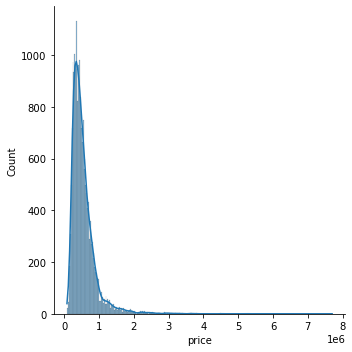

In [6]:
sns.displot(df['price'], kde=True);

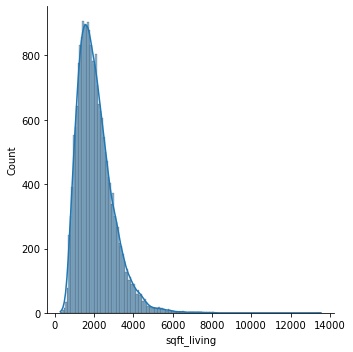

In [7]:
sns.displot(df['sqft_living'], kde=True);

## Sem tratamento de dados

In [8]:
from sklearn.linear_model import LinearRegression

In [10]:
x = df['sqft_living'].values

In [11]:
x

array([1180, 2570,  770, ..., 1020, 1600, 1020], dtype=int64)

In [12]:
x = x.reshape(-1, 1)
x.shape

(21613, 1)

In [14]:
y = df['price'].values
y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [15]:
regressor = LinearRegression()
regressor.fit(x, y)

LinearRegression()

In [16]:
previsoes = regressor.predict(x)

In [17]:
previsoes

array([287555.06702452, 677621.82640197, 172499.40418656, ...,
       242655.29616092, 405416.96554144, 242655.29616092])

In [18]:
y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [20]:
from sklearn.metrics import mean_absolute_error, r2_score

In [21]:
mean_absolute_error(y, previsoes)

173688.2733595311

In [22]:
r2_score(y, previsoes) # mais proximo de 1, melhor o resultado

0.4928532179037931

## Com tratamento dos dados

In [23]:
import numpy as np

In [24]:
x_novo = np.log(x)
x_novo

array([[7.07326972],
       [7.85166118],
       [6.64639051],
       ...,
       [6.92755791],
       [7.37775891],
       [6.92755791]])

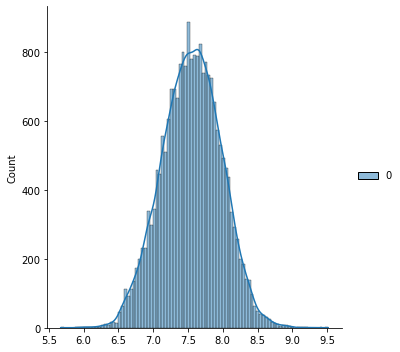

In [25]:
sns.displot(x_novo, kde=True);

In [30]:
y_novo = np.log(y)
y_novo

array([12.30998211, 13.19561384, 12.10071213, ..., 12.90445858,
       12.89921983, 12.69158046])

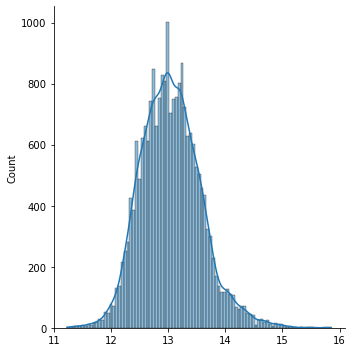

In [31]:
sns.displot(y_novo, kde=True);

In [32]:
regressor = LinearRegression()
regressor.fit(x_novo, y_novo)

LinearRegression()

In [33]:
previsoes = regressor.predict(x_novo)

In [34]:
mean_absolute_error(y_novo, previsoes)

0.314671784942507

In [35]:
r2_score(y_novo, previsoes)

0.45550706431577015